# Analyse de la composition du Réseau Français pour la recherche reproductible

(c) 2025, Gloria González Curto
http://gloriagcurto.info

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

### Library import

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
# save tables as images
from pandas.plotting import table
# save plots in true size
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


### Set style and color pallete

In [28]:
# Minimalist design
sns.set_style("whitegrid")

# RFRR palette definition. 
RFRR_palette = ["#35346b", "#a2dfd9", "#6943a4", "#b89ad3"]
color_codes_RFRR = ['dark_blue', 'light_blue', 'dark_purple', 'light_purple']

c = lambda x: RFRR_palette[color_codes_RFRR.index(x)]

#use example
#import numpy as np
#x=np.random.randn(100)
#g = sns.histplot(x, color=c("dark_purple"))

#plt.show()

### Definition of custom functions

- Generate count and percentage dataframes

In [29]:
def count_percent(data, var, FoldPath, FileName):

#Subset a variable and compute counts and percentage and sort by counts
#data = data_members
#var = "Ville", "Région", "Statut_abrev", "Discipline"
#FoldPath='Results/'
#FileName="counts_percent_"

    df=pd.DataFrame({'Count' :data.groupby(var).size()}).reset_index()
    df= df.assign(Percentage = lambda x: (x['Count'] /df['Count'].sum() * 100)).sort_values(by=['Count'], ascending=False)
    #Save
    filepath= os.path.join(FoldPath, FileName+var+".csv")
    df.to_csv(filepath, sep=';', encoding='latin3', index=False, header=True)
    print(df.head())
    return (df)



- Barplots

In [30]:
def bargraphs_FR (df,var_quant, var, colour, metric, var_FR, FoldPath, FileName):
#Barplot en français
#df = df_p (sortie de count_percent)
#var_quant= "Count" or "Percentage"
#var = "Ville", "Région", "Statut_abrev", "Discipline"
#color= "dark_purple"
#metric= "Nombre", "Pourcentage"
#var_FR= "Ville", "Région", "Statut_abrev", "Discipline"
#FoldPath='Results/Plots/'
#FileName="counts_" or "percentage"
    bar=sns.barplot(data=df_p, x=var_quant, y=var, color=c(colour), legend=False)
    plt.xlabel(metric+" de membres par "+var_FR)
    plt.ylabel(var_FR)
    plt.title("Distribution des membres par "+var_FR)
    #Save
    filepath= os.path.join(FoldPath, FileName+var+"_FR.png")
    bar.figure.savefig(filepath)
    plt.show()
    return(bar)

In [31]:
#Anglais
def bargraphs_EN (df,var_quant, var, colour, metric, var_EN, FoldPath, FileName):
#Barplot en anglais
#df = df_p (sortie de count_percent)
#var_quant= "Count" or "Percentage"
#var = "Ville", "Région", "Statut_abrev", "Discipline"
#color= "dark_purple"
#metric= "Number", "Percentage"
#var_EN="City", "Region", "Discipline", "type of position"
#FoldPath='Results/Plots/'
#FileName="counts_" or "percentage"
    bar=sns.barplot(data=df_p, x=var_quant, y=var, color=c(colour), legend=False)
    plt.xlabel(metric+" of members by "+var_EN)
    plt.ylabel(var_EN)
    plt.title("Distribution of members by "+var_EN)
    #Save
    filepath= os.path.join(FoldPath, FileName+var+"_EN.png")
    bar.figure.savefig(filepath)
    plt.show()
    return(bar)


- Save tables as images

In [32]:
def table_to_image (data, var, FoldPath, FileName) :

    ax = plt.subplot(111, frame_on=False) # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis
    table=pd.plotting.table(ax, data, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
    filepath= os.path.join(FoldPath, FileName+var+".png")
  
    plt.savefig(filepath)
    plt.show()
    return(table)


## Data import and summaries
### Read data

In [33]:

data_members = pd.read_csv('Data/membres_anonyme.csv', sep="\t", header=0, encoding = "latin3")
print(data_members.shape)
data_members.columns

(104, 7)


Index(['Ville', 'Département', 'Région', 'Statut', 'Statut_abrev',
       'Discipline', 'Discipline secondaire'],
      dtype='object')

In [34]:
data_members.head()


Ville        Département                Région  \
0         Annecy       Haute-Savoie  Auvergne-Rhône-Alpes   
1  Aubervilliers  Seine-Saint-Denis         Île-de-France   
2        Aubière        Puy-de-Dôme  Auvergne-Rhône-Alpes   
3        Aubière        Puy-de-Dôme  Auvergne-Rhône-Alpes   
4        Aubière        Puy-de-Dôme  Auvergne-Rhône-Alpes   

                       Statut Statut_abrev    Discipline  \
0     Ingénieur de Recherche            IR      Physique   
1         Ingénieur d'Études            IE    Géographie   
2  Professeur des Universités           PU  Informatique   
3                  Doctorant     Doctorant  Informatique   
4                  Doctorant     Doctorant  Informatique   

                        Discipline secondaire  
0                                Data Science  
1                                         NaN  
2  Simulations stochastiques pour la Physique  
3                            Machine Learning  
4                            Reproductibilité

### Statistical summary of the data:

All variables are categorical

In [35]:
data_members.describe()

Ville Département         Région                   Statut  \
count     104         104            104                      104   
unique     34          30             15                       21   
top     Paris       Paris  Île-de-France  Ingénieur de Recherche    
freq       19          19             31                       31   

       Statut_abrev    Discipline Discipline secondaire  
count           104           104                    73  
unique           14            23                    66  
top              IR  Informatique       Science ouverte  
freq             43            23                     3

#### Summary tables pour les villes, les status et la discipline

Index(['Ville', 'Département', 'Région', 'Statut', 'Statut_abrev',
       'Discipline', 'Discipline secondaire'],
      dtype='object')


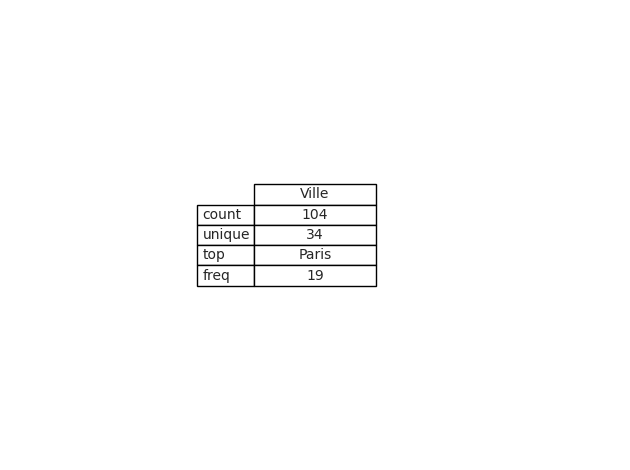

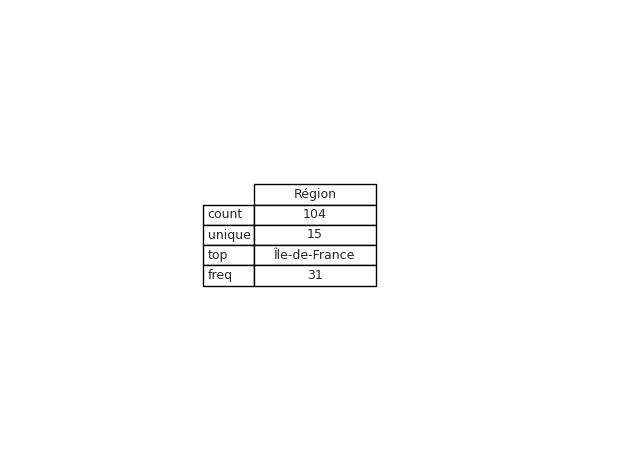

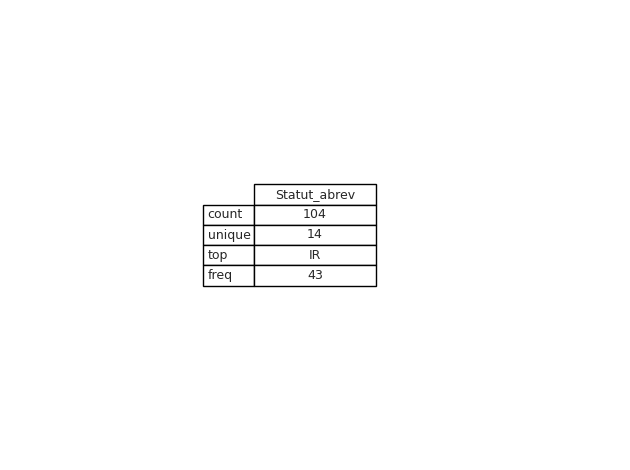

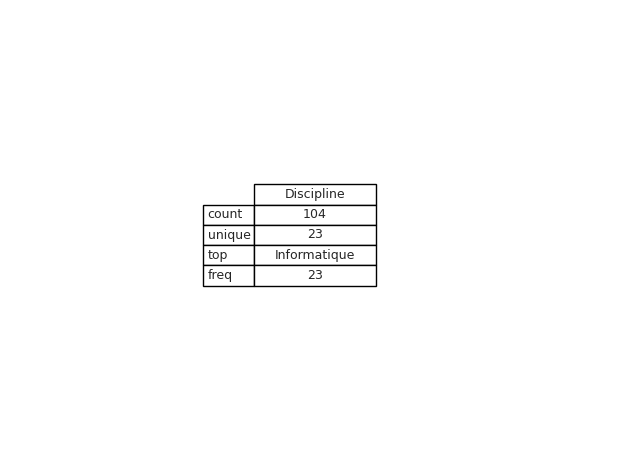

In [36]:
#Check variable names
print(data_members.columns)

# Save Ville summary
ville = data_members['Ville'].describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, ville, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))

plt.savefig('Results/Tables/table_summary_ville_FR.png')
plt.show()

# Save Région summary
region = data_members['Région'].describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, region, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
plt.savefig('Results/Tables/table_summary_region_FR.png')
plt.show()

# Save Statut summary
statut = data_members['Statut_abrev'].describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, statut, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
plt.savefig('Results/Tables/table_summary_statut_FR.png')
plt.show()

# Save Discipline summary
discipline = data_members['Discipline'].describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, discipline, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))

plt.savefig('Results/Tables/table_summary_discipline_FR.png')
plt.show()

#### Membres par région et par discipline

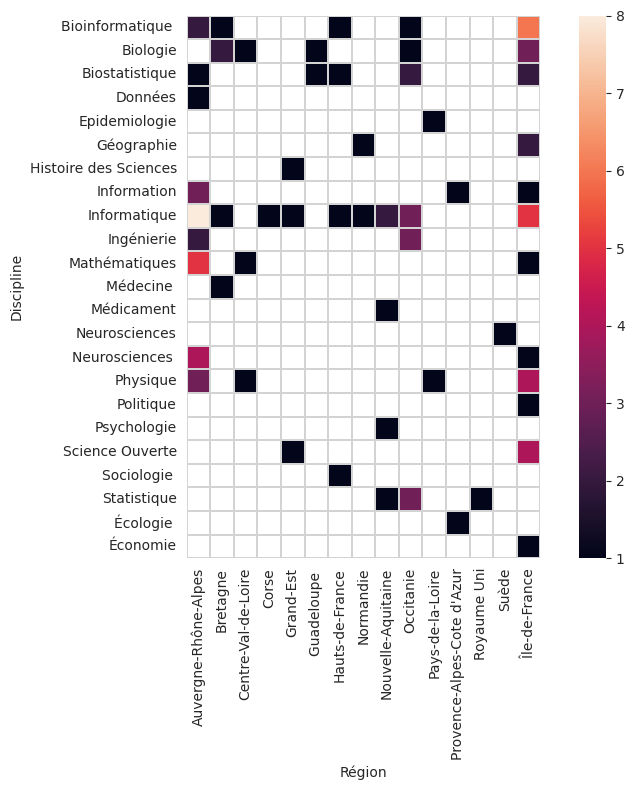

In [37]:
df=pd.DataFrame({'Count' :data_members.groupby(["Région", "Discipline"]).size()}).reset_index()

df.head()

df_heat = df.pivot(index="Discipline", columns="Région", values="Count")
plt.figure(figsize=(8, 8)) 
sns.heatmap(df_heat, linewidths=0.05, linecolor="lightgrey", square=True).get_figure().savefig(('Results/Plots//heatmap_region_discipline_FR.png'))

#plt.yticks(rotation=15)

df.to_csv('Results/members_region_discipline.csv', sep=';', encoding='latin3', index=False, header=True)


## Network composition analysis

### Disciplines


In [38]:
df_p=count_percent(data_members, "Discipline", "Results/", "counts_percent_")


          Discipline  Count  Percentage
8       Informatique     23   22.115385
0   Bioinformatique      11   10.576923
15          Physique      9    8.653846
1           Biologie      8    7.692308
2     Biostatistique      7    6.730769


#### Barplots du nombre de membres par discipline

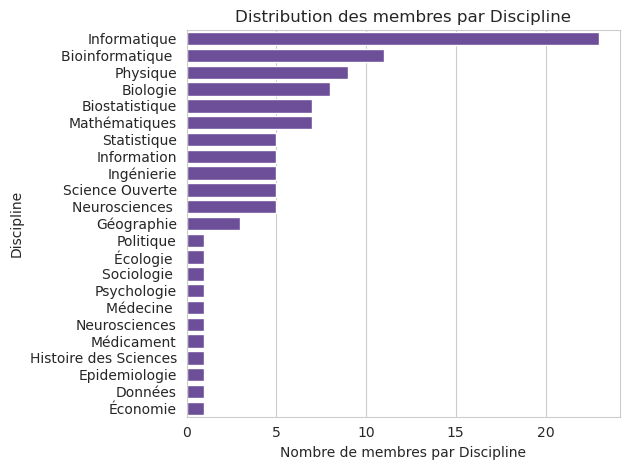

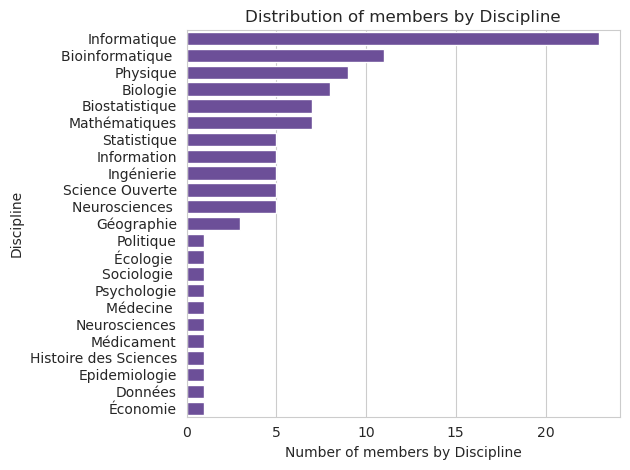

In [39]:
#Français
barp= bargraphs_FR (df_p,"Count", "Discipline", "dark_purple","Nombre",'Discipline', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Discipline", "dark_purple","Number",'Discipline', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

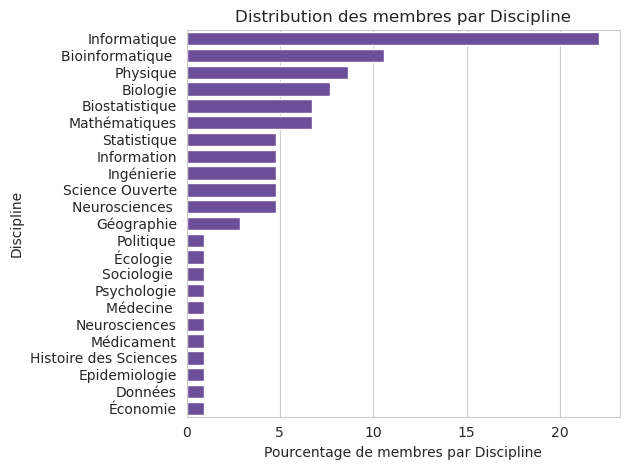

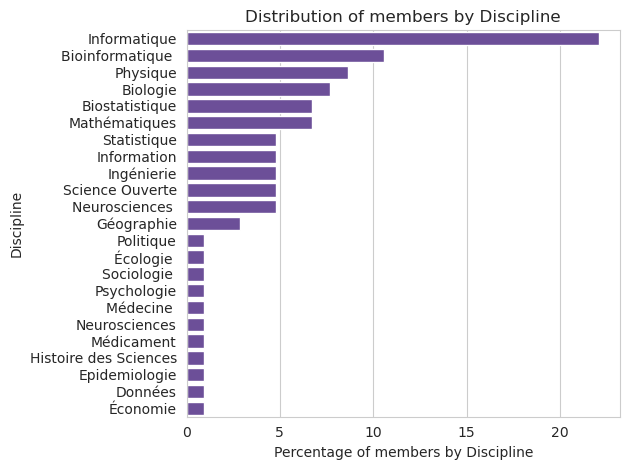

In [40]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Discipline", "dark_purple","Pourcentage", 'Discipline','Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Discipline", "dark_purple","Percentage",'Discipline', 'Results/Plots/',"percentage_")

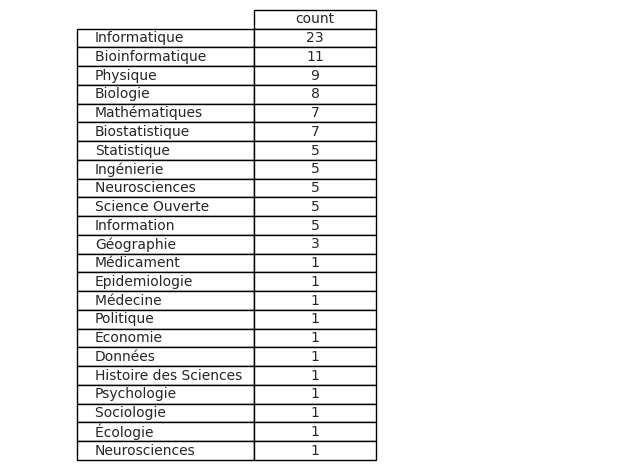

                  count
Discipline             
Informatique         23
Bioinformatique      11
Physique              9
Biologie              8
Mathématiques         7
(23, 1)
count    int64
dtype: object


count
Discipline             
Informatique         23
Bioinformatique      11
Physique              9
Biologie              8
Mathématiques         7

In [41]:
data_members.columns


df=pd.DataFrame(data_members['Discipline'].value_counts(normalize=False))
#df['Discipline']=df.index
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, df, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))

plt.savefig('Results/Tables/table_counts_discipline_FR.png')
plt.show()
print(df.head())
print(df.shape)

print(df.dtypes)
df.head()


### Membres par statut professionnel

In [42]:
df_p=count_percent(data_members, "Statut_abrev", "Results/", "counts_percent_")
# Save tables as images
#table_to_image (data, var, FoldPath, FileName) 

   Statut_abrev  Count  Percentage
10           IR     43   41.346154
4           CR      15   14.423077
9            IE     14   13.461538
12           PU      8    7.692308
11          MdC      7    6.730769


#### Barplots du nombre de membres par statut

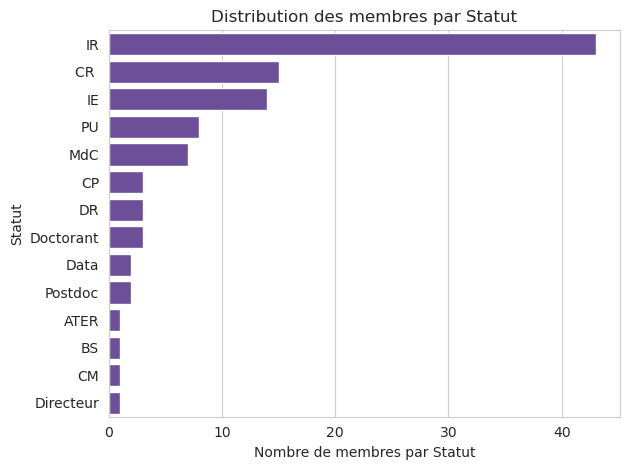

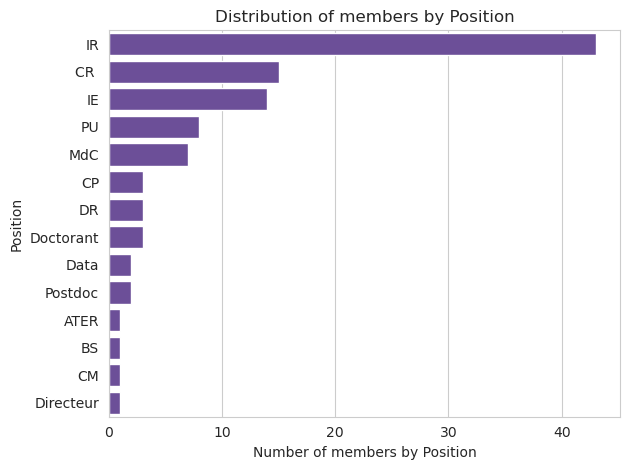

In [43]:
#Français
barp= bargraphs_FR (df_p,"Count", "Statut_abrev", "dark_purple","Nombre", 'Statut', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Statut_abrev", "dark_purple","Number",'Position', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

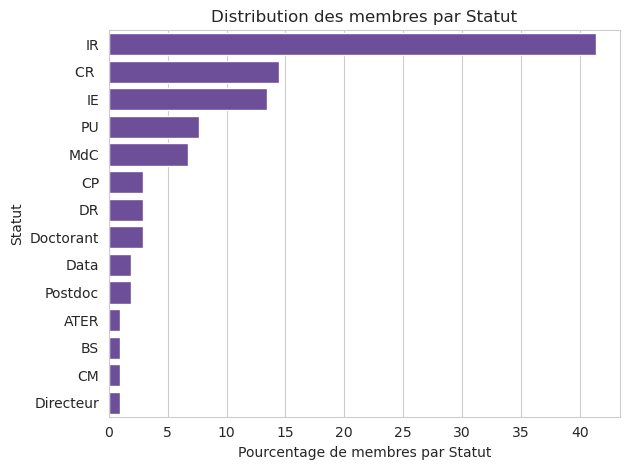

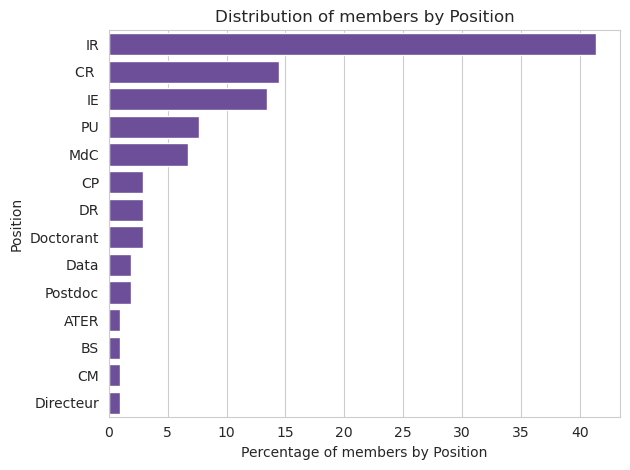

In [44]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Statut_abrev", "dark_purple","Pourcentage",'Statut','Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Statut_abrev", "dark_purple","Percentage",'Position', 'Results/Plots/',"percentage_")

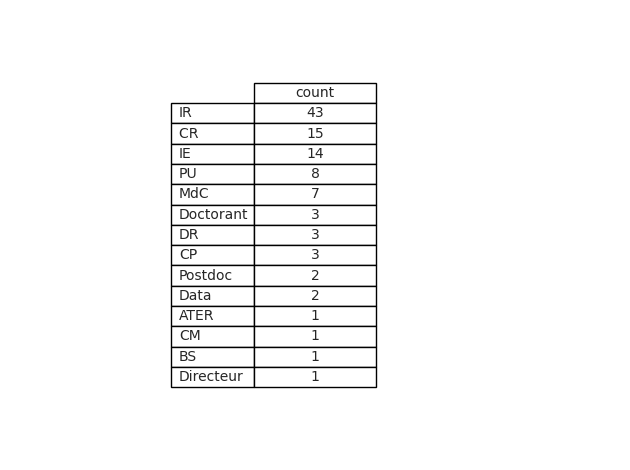

              count
Statut_abrev       
IR               43
CR               15
IE               14
PU                8
MdC               7
(14, 1)
count    int64
dtype: object


count
Statut_abrev       
IR               43
CR               15
IE               14
PU                8
MdC               7

In [45]:
data_members.columns

df=pd.DataFrame(data_members['Statut_abrev'].value_counts(normalize=False))
#rounded_df = df.round(decimals=2)

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, df, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
plt.savefig('Results/Tables/table_counts_statut_FR.png')
plt.show()
print(df.head())
print(df.shape)

print(df.dtypes)
df.head()


### Distribution spatiale du réseaux: Presence sur des villes

In [46]:
df_p=count_percent(data_members, "Ville", "Results/", "counts_percent_")


          Ville  Count  Percentage
22        Paris     19   18.269231
13         Lyon     14   13.461538
8      Grenoble     10    9.615385
32     Toulouse      6    5.769231
15  Montpellier      5    4.807692


#### Barplots du nombre de membres par ville

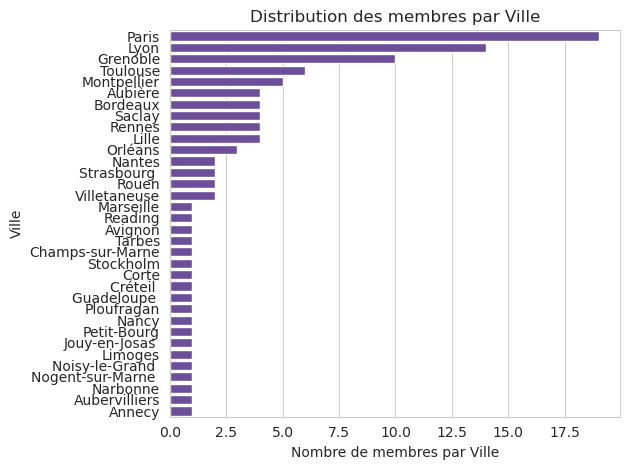

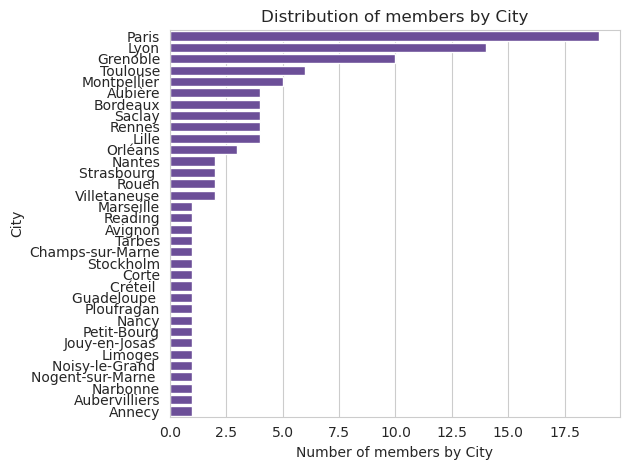

In [47]:
#Français
barp= bargraphs_FR (df_p,"Count", "Ville", "dark_purple","Nombre", 'Ville', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Ville", "dark_purple","Number",'City', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

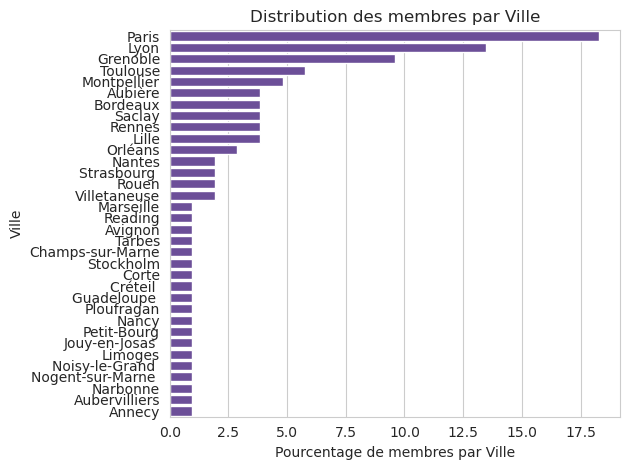

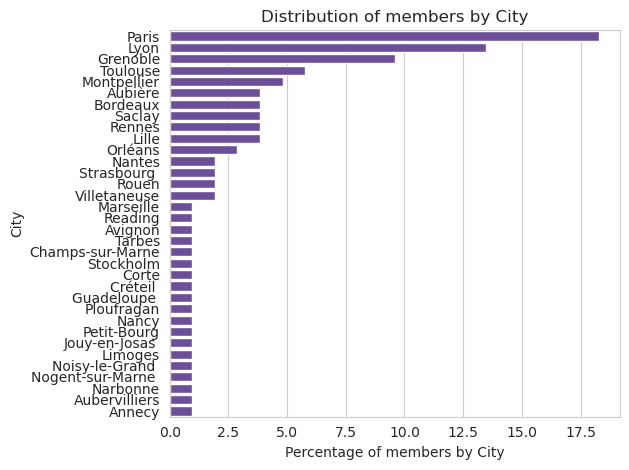

In [48]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Ville", "dark_purple","Pourcentage", 'Ville', 'Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Ville", "dark_purple","Percentage",'City', 'Results/Plots/',"percentage_")

### Distribution spatiale du réseaux: Presence sur les régions

In [49]:
df_p=count_percent(data_members, "Région", "Results/", "counts_percent_")


                  Région  Count  Percentage
14         Île-de-France     31   29.807692
0   Auvergne-Rhône-Alpes     29   27.884615
9              Occitanie     13   12.500000
1               Bretagne      5    4.807692
8     Nouvelle-Aquitaine      5    4.807692


#### Barplots du nombre de membres par ville

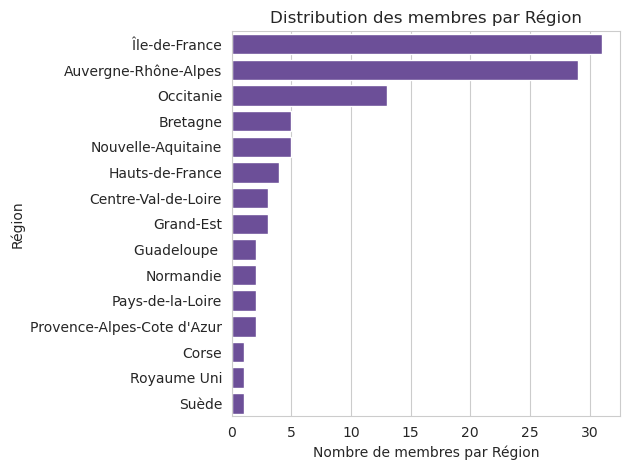

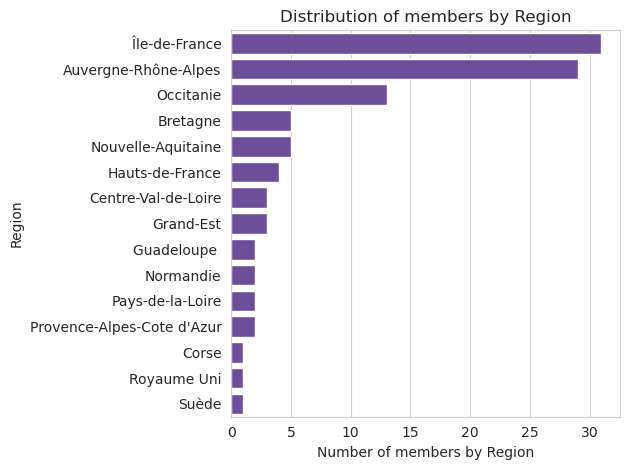

In [50]:
#Français
barp= bargraphs_FR (df_p,"Count", "Région", "dark_purple","Nombre", 'Région', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Région", "dark_purple","Number",'Region', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

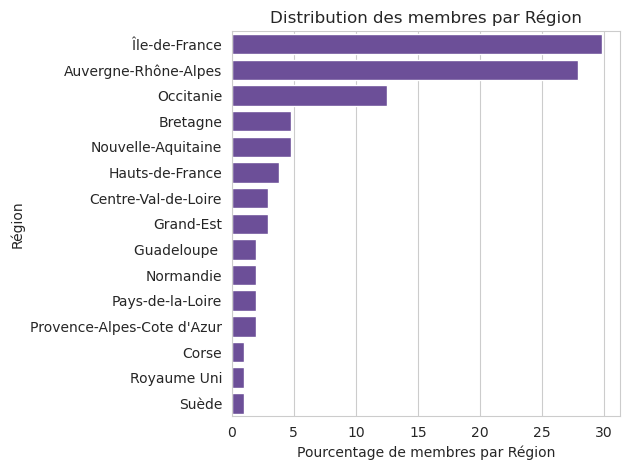

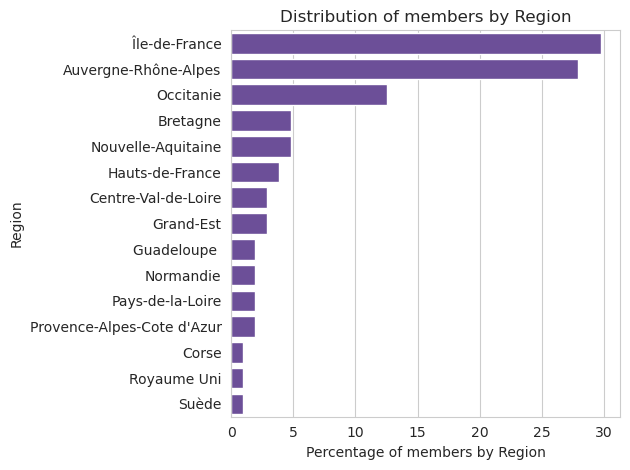

In [51]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Région", "dark_purple","Pourcentage", "Région", 'Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Région", "dark_purple","Percentage",'Region', 'Results/Plots/',"percentage_")

### Distribution par ville et region 

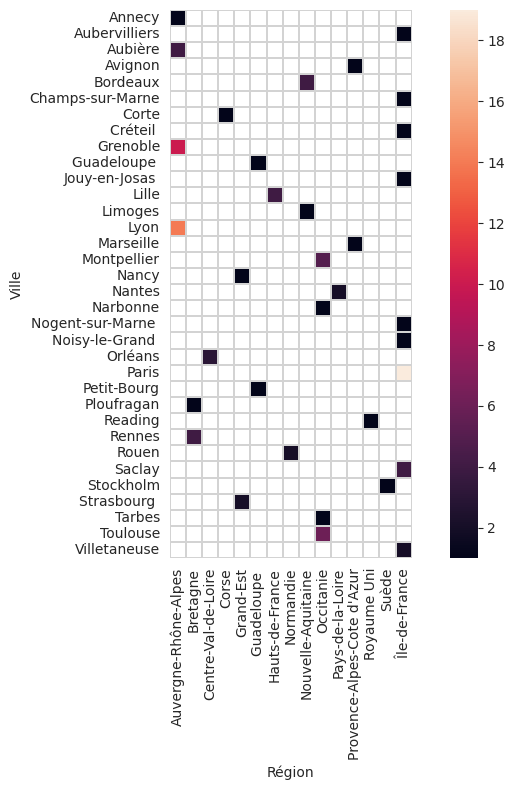

In [52]:
df=pd.DataFrame({'Count' :data_members.groupby(["Région", "Ville"]).size()}).reset_index()

df.head()

df_heat = df.pivot(index="Ville", columns="Région", values="Count")
plt.figure(figsize=(8, 8))
ht = sns.heatmap(df_heat, linewidths=0.05, linecolor="lightgrey", square=True).get_figure().savefig('Results/Plots//heatmap_region_ville_FR.png')
plt.show(ht)
#plt.yticks(rotation=15)
